<a href="https://colab.research.google.com/github/treezy254/Data-Science-Prep/blob/master/fuel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector


In [11]:
fuel = pd.read_csv('fuel.csv')
X = fuel.copy()
y = X.pop('FE')

preprocessor = make_column_transformer(
    (StandardScaler(),
     make_column_selector(dtype_include=np.number)),
     (OneHotEncoder(sparse=False),
      make_column_selector(dtype_include=object)),
)

X= preprocessor.fit_transform(X)
y = np.log(y)
input_shape = [X.shape[1]]
print("input shape: {}".format(input_shape))

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

input shape: [50]


In [14]:
fuel.head()
pd.DataFrame(X[:10, :]).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
0,0.913643,1.068005,0.524148,0.685653,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.913643,1.068005,0.524148,0.685653,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.530594,1.068005,0.524148,0.685653,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.530594,1.068005,0.524148,0.685653,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.296693,2.120794,0.524148,-1.458464,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=input_shape),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1),
])

In [16]:
model.compile(
    optimizer='adam',
    loss='mae'
)


In [17]:
history = model.fit(
    train_X, train_y,
    validation_data=(val_X, val_y),
    batch_size=128,
    epochs=200
)

Epoch 1/200
7/7 [==============================] - 2s 98ms/step - loss: 2.3834 - val_loss: 1.1471
Epoch 2/200
7/7 [==============================] - 0s 12ms/step - loss: 0.7984 - val_loss: 0.8678
Epoch 3/200
7/7 [==============================] - 0s 10ms/step - loss: 0.5976 - val_loss: 0.4523
Epoch 4/200
7/7 [==============================] - 0s 9ms/step - loss: 0.4248 - val_loss: 0.2693
Epoch 5/200
7/7 [==============================] - 0s 11ms/step - loss: 0.3115 - val_loss: 0.2314
Epoch 6/200
7/7 [==============================] - 0s 9ms/step - loss: 0.2244 - val_loss: 0.1982
Epoch 7/200
7/7 [==============================] - 0s 12ms/step - loss: 0.1898 - val_loss: 0.2242
Epoch 8/200
7/7 [==============================] - 0s 12ms/step - loss: 0.1766 - val_loss: 0.1763
Epoch 9/200
7/7 [==============================] - 0s 12ms/step - loss: 0.1461 - val_loss: 0.1393
Epoch 10/200
7/7 [==============================] - 0s 9ms/step - loss: 0.1227 - val_loss: 0.1461
Epoch 11/200
7/7 [====

<AxesSubplot:>

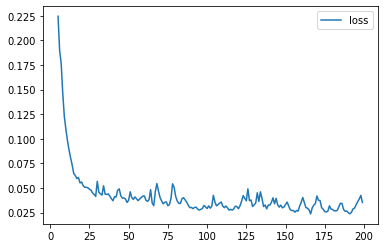

In [19]:
history_df = pd.DataFrame(history.history)
history_df.loc[5:, ['loss']].plot()